In [1]:
# 에브리타임 자취하숙 크롤링
# ------------------2024-08-05
# -----------------made by 서연

In [10]:
import pandas as pd
import time

In [11]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import pyperclip
import time

In [12]:
driver = webdriver.Chrome()

In [13]:
driver.get("https://everytime.kr/388123")

In [14]:
time.sleep(5)

loginId = 'ktjdus'
pyperclip.copy(loginId)
id_ = driver.find_element(By.XPATH, '/html/body/div[1]/div/form/div[1]/input[1]')
id_.send_keys(Keys.CONTROL + 'v')

time.sleep(5)

loginpw = 'rlatjdus5239!!'
pyperclip.copy(loginpw)
pw_ = driver.find_element(By.XPATH, '/html/body/div[1]/div/form/div[1]/input[2]')
pw_.send_keys(Keys.CONTROL + 'v')

In [25]:
soup = bs(driver.page_source, 'lxml')

In [17]:
searchKeyword = '음식'
pyperclip.copy(searchKeyword)
id_ = driver.find_element(By.XPATH, '//*[@id="searchArticleForm"]/input')
id_.send_keys(Keys.CONTROL + 'v')
driver.find_element(By.XPATH, '//*[@id="searchArticleForm"]').click()

In [26]:
url_list = []
title_list = []
content_list = []

for page in range(1, 23):
    url = 'https://everytime.kr/388123/all/%EC%9D%8C%EC%8B%9D/p/{}'.format(page)
    driver.get(url)

    time.sleep(1)

    soup = bs(driver.page_source, 'lxml')

    titles = soup.select('h2.medium.bold')
    
    for i in titles:
        title_list.append(i.text)

    contents = soup.select('p.medium')
        
    for i in contents:
        content_list.append(i.text)

In [27]:
len(title_list), len(content_list)

(102, 423)

In [28]:
content_list

['일반 재활용 음식물다 월~목 사이에만 버리면 되는거 맞나요??',
 '음식물 처리하는 기계 있어?',
 '팔팔 끓는 물에 이거 1~2숟갈 넣으면됨 단점: 양이 너무 많아서 본인이 음식점하는거 아니면 유통기한내에 다 못먹음',
 '쉽게 할 수 있는? 건강 자취 메뉴랑 레시피 기록 중이야요즘 내 소소한 행복 !!구경와요 송이들 😋(음식 사진 하나하나 올리려다 넘 많아서 계정을 올려요 ,,)',
 '오늘 오후 5시쯤에 1캠 후문 gs25 앞에서 가져가실 분 구합니다! 내일 방을 빼서 다른 시간은 어려울 것 같아요음식물 쓰레기봉투는 한 묶음 + 10장 정도쓰레기 봉투는 8장 정도 있어요!!',
 '추천해줘~',
 '좀 싼건 없나..',
 '학교 근처에서 자취 시작하는데…아직 가구도 안들여놓았고 뭐 음식 먹은 적도 없는데 벌레 사체랑 벌레 좀 봤거든… 집주인한테 연락하면 방역 혹시 보통 해줘???만약 안되면 해충마스터 부르려는데 바퀴 말고도 이런저런 벌레 방역에도 효과 있어??',
 '어떻게 없애?원래 전혀 안났는데 얼음에서 이상한 냄새 나서 보니까 냉동실에 있는 음식들 겉비닐에도 다 나더라고..',
 '2월부터 자취했는데 배달음식 친구 놀러올때 말구혼자서 단 한 번도 시킨 적 없어 짱이지사실 걍 뒷정리가 귀찮아서 그럼',
 '음식물쓰레기통 뭐써?',
 '진정한 자취음식은 파스타다가성비에 비주얼 기깔난 엄청난 가심비.#오늘의자취송',
 '제가 지금 본가에 와있는데 음식 택배가 와서 저희집 냉장고랑 냉동고에 넣어주실분 구해요!오카로 학생증인증이랑 실명카톡으로 연락가능하신분지금 바로 해주실분 구합니다사례비 만원드리겠습니다!',
 '-옷에 러브버그나 모기 붙어서 들어오는 경우 많음-방충망 이곳저곳 다 막는다고 벌레 안들어오는거아님 그냥 방충망 구멍으로 모기 다 들어옴-약뿌리고 방충망막고 다 좋은데… 크고 좋은 제습기 하나 사서 집 습하지않게 하는게 제일 벌레 안나옴-집 습하면 집게벌',
 '우리 건물이랑 옆 건물이 쓰레기장을 같이 쓰거든? 근데 누가 자꾸 배달음식 먹고 

In [29]:
data = {"내용" : content_list}

In [30]:
everytime = pd.DataFrame(data)

In [31]:
everytime

,내용
0,일반 재활용 음식물다 월~목 사이에만 버리면 되는거 맞나요??
1,음식물 처리하는 기계 있어?
2,팔팔 끓는 물에 이거 1~2숟갈 넣으면됨 단점: 양이 너무 많아서 본인이 음식점하는...
3,쉽게 할 수 있는? 건강 자취 메뉴랑 레시피 기록 중이야요즘 내 소소한 행복 !!구...
4,오늘 오후 5시쯤에 1캠 후문 gs25 앞에서 가져가실 분 구합니다! 내일 방을 빼...
...,...
418,자취송이들 일주일에 음식몇번이나 해먹어??
419,일반쓰레기봉투랑 음식물쓰레기봉투 다이소에 작은거 팔아?? 어제 이마트 갔는데안판다해...
420,송이들은 음식물쓰레기 어떻게처리해??제일작은봉투사도 한번에 얼마안담기는데 오래두면 ...
421,자취송이들 음식물 쓰레기 소소한 팁....다이소에서 뚜껑있는 미니 쓰레기통 산 담에...


In [77]:
from konlpy.tag import Okt
okt = Okt()

In [92]:
stopwords = ['있다', '되다', '하다', '나', '는', '은', '이', '가', '을', '를', '에', '에서', 
             '에게', '한테', '과', '와', '아', '랑', '으로', '로', '께서', '이나', '이라', '이야', 
             '인가', '이야말로', '그리고', '그런데', '그래서', '그래도', '그러나', '그럼에도', '그러면', 
             '그러니까', '그러므로', '그러니까', '그렇게', '그렇지만', '그렇다면', '아니면', '아니라', 
             '그런', '이런', '그렇지', '그래', '저런', '이러한', '그러한', '저러한', '어떤', '이따', 
             '이래', '이렇게', '저렇게', '그따', '그래서', '아무', '전부', '가지', '갖고', '몇', 
             '무슨', '어느', '몇몇', '어떤', '어떻게', '어떤', '아무', '나', '우리', '당신', '자기', 
             '그녀', '저희', '하다', '되다', '않다', '없다', '있다', '되어다', '하고', '그러면', 
             '그래서', '이렇게', '저렇게', '요즘', '그것', '이것', '저것', '있다고', '그렇지만', '그래도'
            '코웨이', '안녕하세요', '웅진코웨이', '\u200b', '이다', '안녕하다', '아니다', '같다', '거', '것', '음식', '음식물', '송이',
            '오늘', '혹시', '먹다', '송']

In [93]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    words = [word for word, tag in pos_words if tag in ['Noun', 'Adjective', 'Verb'] if word not in stopwords ]
    return words

In [94]:
cleaned_contents_list = []

for content in content_list:
    # 공백 및 줄바꿈 제거
    cleaned_content = content.strip()  # 양쪽 공백 제거
    
    # 연속된 공백을 단일 공백으로 변환
    cleaned_content = ' '.join(cleaned_content.split())
    
    cleaned_contents_list.append(cleaned_content)

In [95]:
# 추출된 단어들을 저장할 리스트
extracted_words_list = []

# cleaned_contents_list에 있는 각 텍스트에 대해 okt_pos_tagging 함수 호출하여 추출된 단어들을 리스트에 저장
for text in cleaned_contents_list:
    extracted_words = okt_pos_tagging(text)
    extracted_words_list.append(extracted_words)

# 저장된 추출된 단어들 리스트 출력
for idx, extracted_words in enumerate(extracted_words_list, start=1):
    print(f"추출된 단어들: {extracted_words}")
    print()

추출된 단어들: ['일반', '재활용', '월', '목', '사이', '버리다', '맞다']

추출된 단어들: ['처리', '기계']

추출된 단어들: ['팔팔', '끓다', '물', '숟갈', '넣다', '단점', '양', '많다', '본인', '음식점', '유통', '내']

추출된 단어들: ['쉬다', '수', '건강', '자취', '메뉴', '레시피', '기록', '중이', '내', '소소하다', '행복', '구경', '요', '사진', '하나', '하나', '올리다', '넘다', '많다', '계정', '올리다']

추출된 단어들: ['오후', '캠', '후문', '앞', '가져가다', '분', '구합', '니', '내일', '방', '빼다', '다른', '시간', '어리다', '쓰레기봉투', '묶음', '장', '정도', '쓰레기', '봉투', '장', '정도']

추출된 단어들: ['추천', '해주다']

추출된 단어들: ['좀', '싸다']

추출된 단어들: ['학교', '근처', '자취', '시작', '가구', '들여놓다', '뭐', '적도', '벌레', '사체', '벌레', '좀', '보다', '집주인', '연락', '방역', '보통', '해주다', '만약', '안되다', '해충', '마스터', '부르다', '바퀴', '벌레', '방역', '효과']

추출된 단어들: ['어떻다', '없애다', '원래', '전혀', '나다', '얼음', '이상하다', '냄새', '나서다', '보', '냉동', '실', '겉', '비닐', '나다']

추출된 단어들: ['자취', '배달', '친구', '놀다', '때', '말', '혼자', '단', '번', '시키다', '적', '이지', '사실', '뒷정리', '귀찮다', '그렇다']

추출된 단어들: ['쓰레기통', '뭐', '써다']

추출된 단어들: ['진정하다', '자취', '파스타', '다가', '성비', '비주', '얼', '기', '깔다', '엄청나다', '가시다', '비']

추출된 단어들: ['제

In [96]:
data = {"내용" : cleaned_contents_list, "추출된 단어" : extracted_words_list}

In [97]:
everytime_df = pd.DataFrame(data)

In [98]:
everytime_df

,내용,추출된 단어
0,일반 재활용 음식물다 월~목 사이에만 버리면 되는거 맞나요??,"[일반, 재활용, 월, 목, 사이, 버리다, 맞다]"
1,음식물 처리하는 기계 있어?,"[처리, 기계]"
2,팔팔 끓는 물에 이거 1~2숟갈 넣으면됨 단점: 양이 너무 많아서 본인이 음식점하는...,"[팔팔, 끓다, 물, 숟갈, 넣다, 단점, 양, 많다, 본인, 음식점, 유통, 내]"
3,쉽게 할 수 있는? 건강 자취 메뉴랑 레시피 기록 중이야요즘 내 소소한 행복 !!구...,"[쉬다, 수, 건강, 자취, 메뉴, 레시피, 기록, 중이, 내, 소소하다, 행복, ..."
4,오늘 오후 5시쯤에 1캠 후문 gs25 앞에서 가져가실 분 구합니다! 내일 방을 빼...,"[오후, 캠, 후문, 앞, 가져가다, 분, 구합, 니, 내일, 방, 빼다, 다른, ..."
...,...,...
418,자취송이들 일주일에 음식몇번이나 해먹어??,"[자취, 일주일, 몇번, 해먹]"
419,일반쓰레기봉투랑 음식물쓰레기봉투 다이소에 작은거 팔아?? 어제 이마트 갔는데안판다해...,"[쓰레기봉투, 쓰레기봉투, 다이소, 작다, 팔, 어제, 이마트, 가다, 판다]"
420,송이들은 음식물쓰레기 어떻게처리해??제일작은봉투사도 한번에 얼마안담기는데 오래두면 ...,"[쓰레기, 어떻다, 처리, 해, 은봉, 투사, 한번, 얼, 마안, 담기다, 두다, ..."
421,자취송이들 음식물 쓰레기 소소한 팁....다이소에서 뚜껑있는 미니 쓰레기통 산 담에...,"[자취, 쓰레기, 소소하다, 팁, 다이소, 뚜껑, 미니, 쓰레기통, 산, 담, 거기..."


In [99]:
# 피클 파일로 저장
pickle_file = 'everytime_food_df.pkl'
everytime_df.to_pickle(pickle_file)

In [100]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [101]:
count_list = []

for words in extracted_words_list:
    count  = Counter(words)
    count.most_common(100) 
    count_list.append(count)

In [102]:
count_list

[Counter({'일반': 1, '재활용': 1, '월': 1, '목': 1, '사이': 1, '버리다': 1, '맞다': 1}),
 Counter({'처리': 1, '기계': 1}),
 Counter({'팔팔': 1,
          '끓다': 1,
          '물': 1,
          '숟갈': 1,
          '넣다': 1,
          '단점': 1,
          '양': 1,
          '많다': 1,
          '본인': 1,
          '음식점': 1,
          '유통': 1,
          '내': 1}),
 Counter({'하나': 2,
          '올리다': 2,
          '쉬다': 1,
          '수': 1,
          '건강': 1,
          '자취': 1,
          '메뉴': 1,
          '레시피': 1,
          '기록': 1,
          '중이': 1,
          '내': 1,
          '소소하다': 1,
          '행복': 1,
          '구경': 1,
          '요': 1,
          '사진': 1,
          '넘다': 1,
          '많다': 1,
          '계정': 1}),
 Counter({'장': 2,
          '정도': 2,
          '오후': 1,
          '캠': 1,
          '후문': 1,
          '앞': 1,
          '가져가다': 1,
          '분': 1,
          '구합': 1,
          '니': 1,
          '내일': 1,
          '방': 1,
          '빼다': 1,
          '다른': 1,
          '시간': 1,
          '어리다': 1,
  

In [103]:
# 모든 Counter 객체를 합치기
total_counter = Counter()
for counter in count_list:
    total_counter += counter

In [104]:
total_counter

Counter({'쓰레기': 123,
         '버리다': 121,
         '배달': 119,
         '자취': 98,
         '시키다': 74,
         '살다': 62,
         '쓰다': 58,
         '어떻다': 57,
         '때': 55,
         '봉투': 52,
         '집': 52,
         '냄새': 50,
         '보다': 48,
         '나오다': 45,
         '진짜': 45,
         '넣다': 43,
         '하숙': 43,
         '내': 40,
         '그냥': 40,
         '좋다': 38,
         '사람': 38,
         '안': 37,
         '들다': 37,
         '정도': 36,
         '그렇다': 36,
         '벌레': 35,
         '많다': 33,
         '알다': 33,
         '방': 32,
         '수': 31,
         '오다': 31,
         '개': 31,
         '층': 31,
         '추천': 30,
         '좀': 30,
         '냉장고': 30,
         '두다': 30,
         '모르다': 29,
         '남다': 29,
         '돼다': 28,
         '음': 28,
         '해주다': 26,
         '학교': 25,
         '싱크대': 25,
         '가다': 24,
         '생각': 24,
         '뭐': 23,
         '냉동': 23,
         '싶다': 23,
         '받다': 23,
         '앞': 22,
         '들어오다': 22,
         

<function matplotlib.pyplot.show(close=None, block=None)>

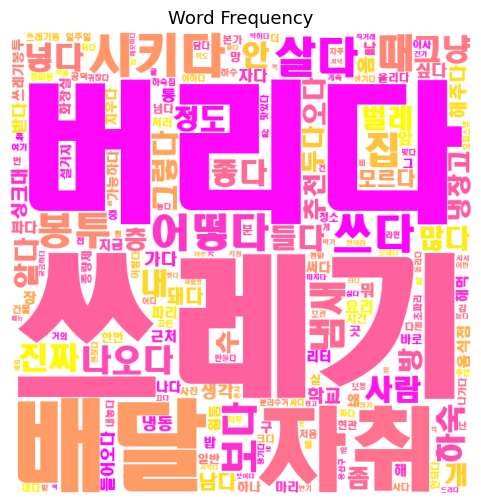

In [105]:
from wordcloud import WordCloud

# 한글 폰트 경로 설정
font_path = "'C:\Windows\Fonts\HMKMRHD.TTF"

# WordCloud 객체 생성
wordcloud = WordCloud(font_path=font_path,
                      width=700, 
                      height=700, 
                      background_color='white',
                      colormap='spring',
                      random_state=1).generate_from_frequencies(total_counter)

# 시각화
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13) 
plt.show